In [1]:
# The package optimization contains all the functions presented earlier. In this case, we need the quadraticDirect and the conjugateGrsdient functions.
import optimization as opt
def newtonLocalQuadratic(obj,x0,eps,cg=False,maxiter=100):
    n = len(x0)
    xk = x0
    iters = list()
    (f,g,H) = obj(xk)
    iters.append([xk,f,g,H])
    k = 0
    while linalg.norm(g) > eps and k < maxiter:
        if cg:
            d = opt.conjugateGradient(H,g,np.zeros((n,1)))[0]
        else:
            d = opt.quadraticDirect(H,g)
        xk = xk + d
        (f,g,H) = obj(xk)
        iters.append([xk,f,g,H])
        k += 1
    return (xk,iters)

Consider the function \\[f(x,y) = 2x^3+6xy^2 -3y^3-150x \\].

Then the gradient is \\[ \nabla f(x) = \left( \begin{array}{c} 6x^2+6y^2-150 \\ 12xy-9y^2 \end{array} \right) \\]
and the hessian is  \\[\nabla^2 f(x) = \left( \begin{array}{c} 12x & 12y\\12y & 12x-18y\end{array} \right). \\]

We apply Newton's local algorithm by quadratic modeling in order to find the minimum starting from the points $(6.2,-3.4)$ with $\epsilon=10^{-5}$. Then we plot the different iterations.

In [2]:
import numpy as np
from scipy import linalg

def func(x):
    f = 2*x[0]**3 + 6*x[0]*x[1]**2 -3*x[1]**3 -150*x[0]
    g = np.array([6*x[0]**2 + 6*x[1]**2-150,12*x[0]*x[1]-9*x[1]**2])
    h = np.array([[12*x[0], 12*x[1]],[12*x[1], 12*x[0]-18*x[1]]])
    return f,g,h

x0 = np.array([6.2,-3.4])
eps = 10**(-5)
(xk,iters) = newtonLocalQuadratic(func,x0,eps)
print('The minimum reached is ',xk,' and it takes ',len(iters),' iterations.')

The minimum reached is  [ 5.00000000e+00 -2.14891586e-11]  and it takes  6  iterations.


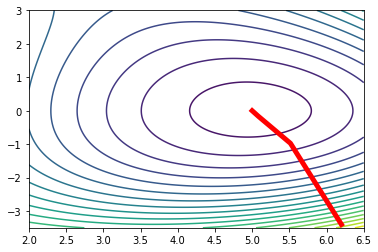

In [3]:
import matplotlib.pyplot as plt
def theFunctionToPlot(x,y):
    return(2*x**3 + 6*x*y**2 -3*y**3 -150*x)

xlist = np.linspace(2.0,6.5,1000)
ylist = np.linspace(-3.5,3.0,1000)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,20)
xiter = [iters[k][0].item(0) for k in range(len(iters))]
yiter = [iters[k][0].item(1) for k in range(len(iters))]
xiter
plt.plot(xiter,yiter, linewidth=5, color='r')
plt.show()